In [2]:
import os
os.chdir('D:\\data\Machine Learning A-Z Template Folder\\Part 2 - Regression\\Section 4 - Simple Linear Regression')

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
data = pd.read_csv('Salary_Data.csv')

In [42]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Linear Model

In [44]:
from sklearn.linear_model import LinearRegression
reg_lr = LinearRegression()

reg_lr.fit(data['YearsExperience'].to_frame(),data['Salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#Applying K-Fole cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=reg_lr, X= data['YearsExperience'].to_frame(), y=data['Salary'],cv=10,scoring='neg_mean_squared_error')

In [53]:
error = []
for i in accuracies:
    error.append(np.sqrt(-i))

Since error is a penalty function where we try to minimize unlike accuracies which is a reward function to maximize. So to by defalt select the maximum value from cross val score, we negated the mean_square_error

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [70]:
print("Accuracy",pd.DataFrame(error).mean().tolist())
print("S.Deviation",pd.DataFrame(error).std().tolist())

Accuracy [6014.431950150655]
S.Deviation [1546.8819591237896]


# Multiple Regression

In [17]:
os.chdir('D:\\data\\Machine Learning A-Z Template Folder\\Part 2 - Regression\\Section 5 - Multiple Linear Regression')

In [18]:
data = pd.read_csv('50_Startups.csv')

In [19]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
data.columns = ['R&D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit']

In [21]:
data.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Columns `R&D_Spend, Administration , Marketing_Spend and State` are the Independent Variables that we are going to used to predict `Profit` columns

In [22]:
data.isnull().sum()

R&D_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

No Data missing

### Handling State
State is a categorical variable and need to be encoded into numbers for Machine Learning. 

1. Lets find out Cardinality

2. Encode its Label

3. Since State is not a ordinal variable we need to do OneHotEncoding for it

point 2 and 3 can be collectively handle using feature engine

In [24]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [26]:
#OneHotEncode State Variable with help of pd.get_dummies also but we are going to use
#Feature Engine to do this

from feature_engine.categorical_encoders import OneHotCategoricalEncoder
onehot = OneHotCategoricalEncoder(variables=['State'],drop_last=True)


In [27]:
data = onehot.fit_transform(data)

In [28]:
data.head()

,R&D_Spend,Administration,Marketing_Spend,Profit,State_New York,State_California
0,165349.20,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,1
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,0


State_Florida is automatically dropped by the Feature_Engine package. 

Feature scaling is required for `ALL Model` so we are going to stanardize independent variables.

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
x_hdr = ['R&D_Spend','Administration','Marketing_Spend','State_New York','State_California']
y_hdr = ['Profit']

In [33]:
data[x_hdr] = scaler.fit_transform(data[x_hdr])

In [34]:
data.head()

,R&D_Spend,Administration,Marketing_Spend,Profit,State_New York,State_California
0,2.016411,0.560753,2.153943,192261.83,1.393261,-0.717741
1,1.955860,1.082807,1.923600,191792.06,-0.717741,1.393261
2,1.754364,-0.728257,1.626528,191050.39,-0.717741,-0.717741
3,1.554784,-0.096365,1.422210,182901.99,1.393261,-0.717741
4,1.504937,-1.079919,1.281528,166187.94,-0.717741,-0.717741


All features(including dummy) except Target is now Standardized.

Does Target variable also need to be scaled?

In [36]:
# Lets move to Modelling
from sklearn.linear_model import LinearRegression
reg_lr = LinearRegression()

reg_lr.fit(data[x_hdr],data[y_hdr])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#Applying K-Fole cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=reg_lr, X= data[x_hdr], y=data[y_hdr],cv=10,scoring='neg_mean_squared_error')

In [38]:
accuracies

array([-6.34272709e+07, -2.95055412e+07, -1.53297469e+08, -1.04752197e+08,
       -2.17805831e+07, -3.51212153e+07, -1.70270109e+07, -1.29409517e+08,
       -3.21140947e+07, -4.47143901e+08])

In [41]:
error = []
for i in accuracies:
    error.append(np.sqrt(-i))

print("Accuracy",pd.DataFrame(error).mean().tolist())
print("S.Deviation",pd.DataFrame(error).std().tolist())

Accuracy [8892.041217618735]
S.Deviation [5195.027855172949]


# Polynomial Linear Regression

In [42]:
os.chdir('D:\data\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 6 - Polynomial Regression')

In [43]:
data = pd.read_csv('Position_Salaries.csv')

In [44]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


A company follows above salary structure and want to hire a new employee who is at 6.5 level and is earning 160k salary. Lets see the employee is saying true or is he bluffing.

Lets find the relation of Level and Salary

In [45]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [94]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,2].values

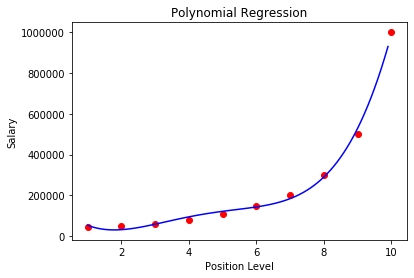

In [98]:
# Polynomial Regression                :: do NOT require feature scaling
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)

x_poly = poly_reg.fit_transform(x)            # Generating polynomial values after transforming the x to degree 4

lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)                         # fitting x_poly to y

# plotting with increment of 0.1 for more granular level precision
x_grid = np.arange(min(x),max(x),0.1)         # gives Vector
x_grid = x_grid.reshape((len(x_grid),1))      # changing vector to Matrix

plt.scatter(x,y, color='red')
plt.plot(x_grid,lin_reg.predict(poly_reg.fit_transform(x_grid)), color='blue')  # prediction with increment of 0.1
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [107]:
lin_reg.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])

So the employee salary is nearly 160k and he is not bluffing

# Support Vector Machines

In [108]:
os.chdir('D:\data\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)')

In [109]:
data = pd.read_csv('Position_Salaries.csv')

In [112]:
from sklearn.svm import SVR
reg_svr = SVR(kernel='rbf') #rbf = Gaussian , we are selecting this as we know that our problem is non linear

In [114]:
reg_svr.fit(data['Level'].to_frame(),data['Salary'])

C:\Users\AV255007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

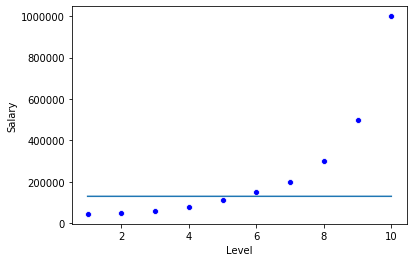

In [121]:
sns.scatterplot(data=data,x=data['Level'],y=data['Salary'],color='blue')
plt.plot(data['Level'],reg_svr.predict(data['Level'].to_frame()))

### SVR require a Feature Scaling

In [140]:
scale_x = StandardScaler()
scale_y = StandardScaler()

In [141]:
x = scale_x.fit_transform(data['Level'].to_frame())
y = scale_y.fit_transform(data['Salary'].to_frame())

In [142]:
reg_svr.fit(x,y)

C:\Users\AV255007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

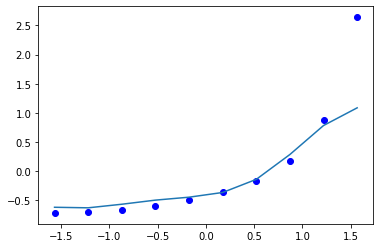

In [143]:
plt.scatter(x=x,y=y,color='blue')
plt.plot(x,reg_svr.predict(x))

In [147]:
mask = reg_svr.predict(scale_x.transform([[6.5]]))
scale_y.inverse_transform(mask)

array([170370.0204065])

Employee that have a 6.5 level may have a 170k salary

# Decision Tree Regression

In [149]:
os.chdir('D:\data\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 8 - Decision Tree Regression')

In [150]:
data = pd.read_csv('Position_Salaries.csv')

In [151]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data['Level'].to_frame(),data['Salary'])



DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [153]:
regressor.predict([[6.5]]) 

array([150000.])

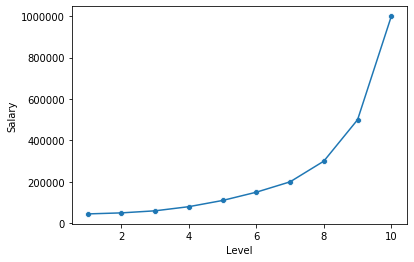

In [158]:
sns.scatterplot(data=data,x='Level',y='Salary')

plt.plot(data['Level'],regressor.predict())

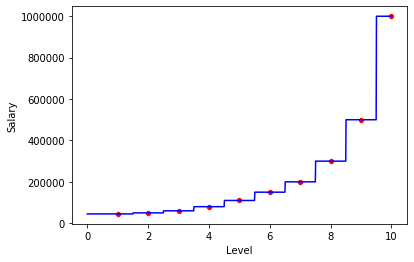

In [175]:
# Visualization
x_grid = np.arange(start=0, stop=10,step=0.01)  # increasing the granularity of data by incrementing it by 0.01
x_grid = x_grid.reshape((len(x_grid), 1))                # changing vector to matrix

sns.scatterplot(data=data,x='Level',y='Salary',color='red')
plt.plot(x_grid,regressor.predict(x_grid), color='blue')

# Random Forest

In [176]:
os.chdir('D:\data\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 9 - Random Forest Regression')

In [177]:
data = pd.read_csv('Position_Salaries.csv')

In [178]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, criterion='mse',random_state=0)

In [180]:
regressor.fit(data['Level'].to_frame(),data['Salary'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

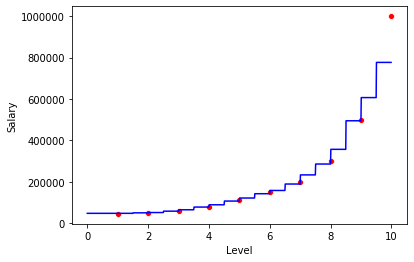

In [181]:
# Visualization
x_grid = np.arange(start=0, stop=10,step=0.01)  # increasing the granularity of data by incrementing it by 0.01
x_grid = x_grid.reshape((len(x_grid), 1))                # changing vector to matrix

sns.scatterplot(data=data,x='Level',y='Salary',color='red')
plt.plot(x_grid,regressor.predict(x_grid), color='blue')